In [7]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib
import matplotlib.pyplot as plt
#import matplotlib.pyplot as plt 
print(np.__version__)
print(pd.__version__)
print(sklearn.__version__)
print(matplotlib.__version__)

1.13.3
0.23.4
0.20.2
2.2.3


#### 선형회귀 경사하강법 구현

In [8]:
import numpy as np

def prediction(theta_0, theta_1, x):
    return theta_0 + theta_1*x
    """주어진 학습 데이터 벡터 x에 대해서 모든 예측 값을 벡터로 리턴하는 함수"""
    # 지난 실습의 코드를 여기에 붙여 넣으세요
    
    
def prediction_difference(theta_0, theta_1, x, y):
    """모든 예측 값들과 목표 변수들의 오차를 벡터로 리턴해주는 함수"""
    return prediction(theta_0,theta_1,x)-y
    # 지난 실습의 코드를 여기에 붙여 넣으세요
    
    
def gradient_descent(theta_0, theta_1, x, y, iterations, alpha):
    m=len(x)
    """주어진 theta_0, theta_1 변수들을 경사 하강를 하면서 업데이트 해주는 함수"""
    for _ in range(iterations):  # 정해진 번만큼 경사 하강을 한다
        error = prediction_difference(theta_0, theta_1, x, y)  # 예측값들과 입력 변수들의 오차를 계산
        # 여기에 코드를 작성하세요
        theta_0 = theta_0-alpha*np.mean(error) 
        theta_1 = theta_1-alpha*np.mean(error*x)
        
    return theta_0, theta_1
    
    
# 입력 변수(집 크기) 초기화 (모든 집 평수 데이터를 1/10 크기로 줄임)
house_size = np.array([0.9, 1.4, 2, 2.1, 2.6, 3.3, 3.35, 3.9, 4.4, 4.7, 5.2, 5.75, 6.7, 6.9])

# 목표 변수(집 가격) 초기화 (모든 집 값 데이터를 1/10 크기로 줄임)
house_price = np.array([0.3, 0.75, 0.45, 1.1, 1.45, 0.9, 1.8, 0.9, 1.5, 2.2, 1.75, 2.3, 2.49, 2.6])

# theta 값들 초기화 (아무 값이나 시작함)
theta_0 = 2.5
theta_1 = 0

# 학습률 0.1로 200번 경사 하강
theta_0, theta_1 = gradient_descent(theta_0, theta_1, house_size, house_price, 200, 0.1)

theta_0, theta_1

(0.16821801417752186, 0.34380324023511988)

#### 경사하강법 시각화

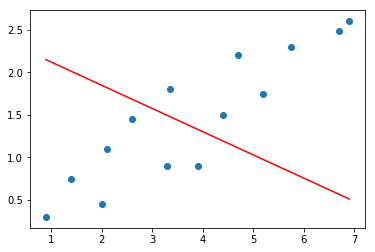

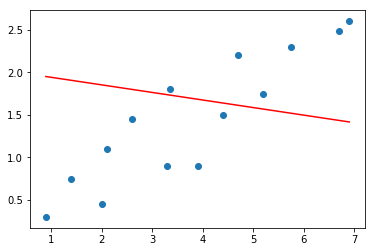

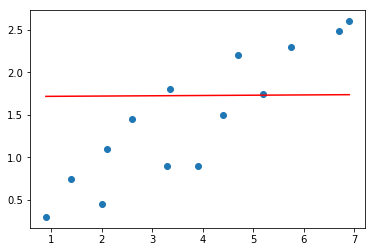

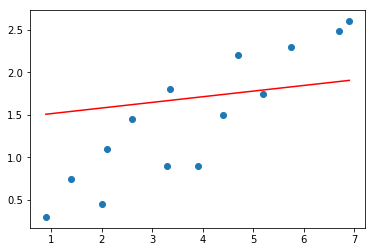

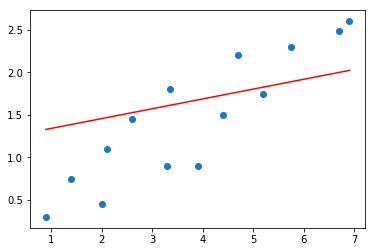

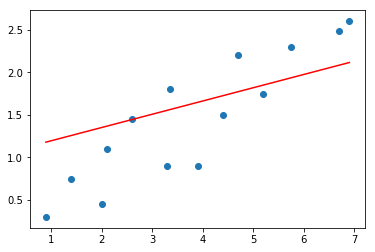

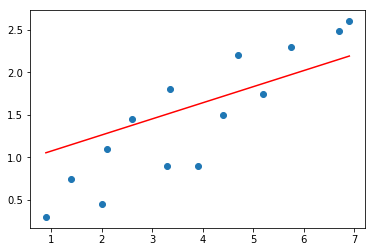

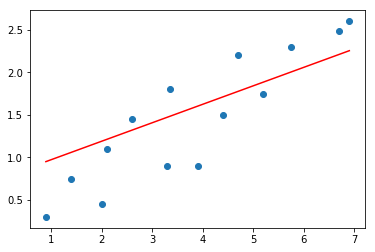

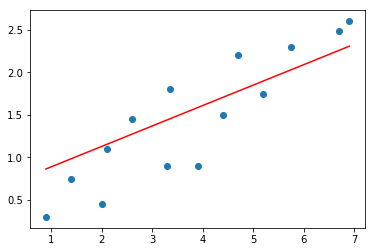

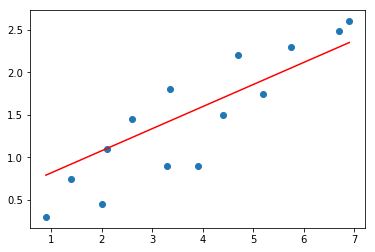

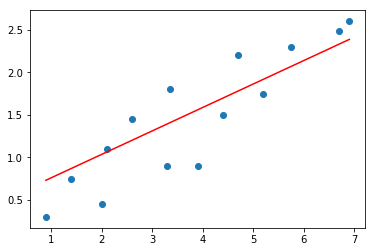

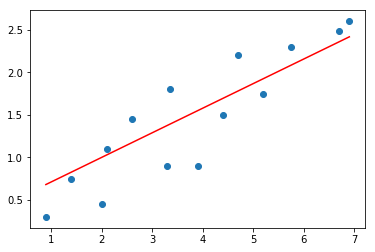

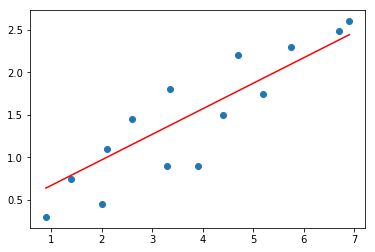

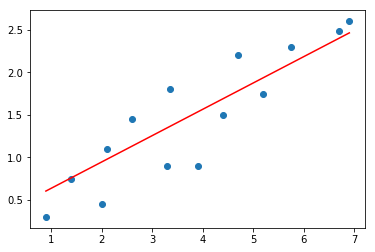

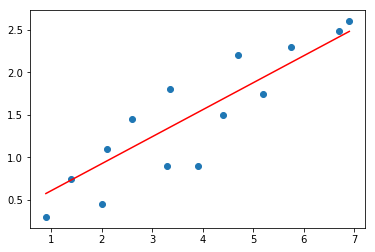

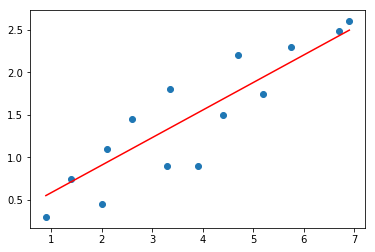

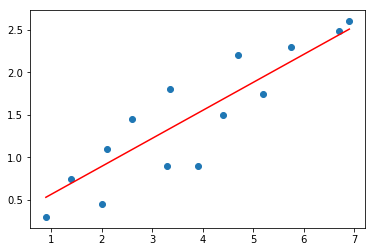

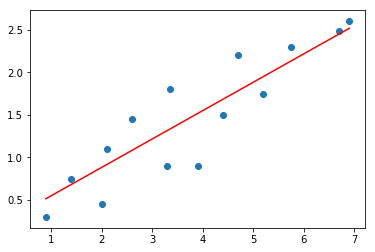

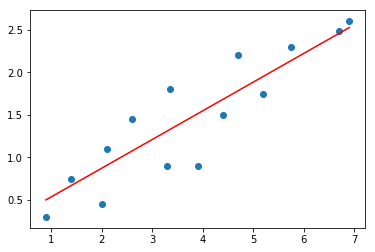

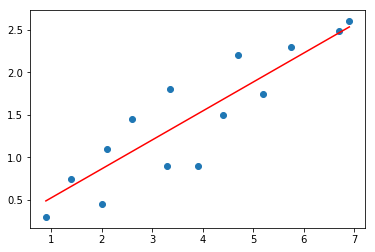

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def prediction(theta_0, theta_1, x):
    return theta_0 + theta_1*x
    """주어진 학습 데이터 벡터 x에 대해서 모든 예측 값을 벡터로 리턴하는 함수"""
    # 지난 실습의 코드를 여기에 붙여 넣으세요
    
    
def prediction_difference(theta_0, theta_1, x, y):
    """모든 예측 값들과 목표 변수들의 오차를 벡터로 리턴해주는 함수"""
    return prediction(theta_0,theta_1,x)-y
    # 지난 실습의 코드를 여기에 붙여 넣으세요
    
    
def gradient_descent(theta_0, theta_1, x, y, iterations, alpha):
    m=len(x)
    cost_list = [] # 비용함수 값을 저장할 리스트
    """주어진 theta_0, theta_1 변수들을 경사 하강를 하면서 업데이트 해주는 함수"""
    for _ in range(iterations):  # 정해진 번만큼 경사 하강을 한다
        error = prediction_difference(theta_0, theta_1, x, y)  # 예측값들과 입력 변수들의 오차를 계산
        cost = (error@error) / (2*m)  # 비용함수 계산
        cost_list.append(cost)  # 비용함수 값을 리스트에 추가
        theta_0 = theta_0-alpha*np.mean(error) 
        theta_1 = theta_1-alpha*np.mean(error*x)

        if _%10==0:
            plt.scatter(house_size, house_price)
            plt.plot(house_size, prediction(theta_0, theta_1,x), color='red')
            plt.show()
        
        
    return theta_0, theta_1, cost_list
    
    
# 입력 변수(집 크기) 초기화 (모든 집 평수 데이터를 1/10 크기로 줄임)
house_size = np.array([0.9, 1.4, 2, 2.1, 2.6, 3.3, 3.35, 3.9, 4.4, 4.7, 5.2, 5.75, 6.7, 6.9])

# 목표 변수(집 가격) 초기화 (모든 집 값 데이터를 1/10 크기로 줄임)
house_price = np.array([0.3, 0.75, 0.45, 1.1, 1.45, 0.9, 1.8, 0.9, 1.5, 2.2, 1.75, 2.3, 2.49, 2.6])

# theta 값들 초기화 (아무 값이나 시작함)
theta_0 = 2.5
theta_1 = 0


# 학습률 0.1로 200번 경사 하강
theta_0, theta_1, cost_list = gradient_descent(theta_0, theta_1, house_size, house_price, 200, 0.1)

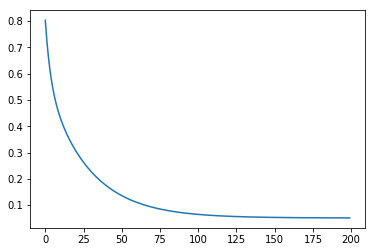

In [10]:
plt.plot(cost_list)